[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/QuantLet/EMQA/blob/main/EMQA_energy_overview/EMQA_energy_overview.ipynb)

# EMQA_energy_overview

Overview of major energy commodity prices (2020-2025): Oil, Gas, and Electricity.

**Output:** `energy_markets_overview.pdf`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({
    'figure.facecolor': 'none',
    'axes.facecolor': 'none',
    'savefig.facecolor': 'none',
    'savefig.transparent': True,
    'axes.grid': False,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'font.size': 11,
    'figure.figsize': (12, 6),
})

COLORS = {
    'blue': '#1A3A6E', 'red': '#CD0000', 'green': '#2E7D32',
    'orange': '#E67E22', 'purple': '#8E44AD', 'gray': '#808080',
    'cyan': '#00BCD4', 'amber': '#B5853F'
}

def save_fig(fig, name):
    fig.savefig(name, bbox_inches='tight', transparent=True, dpi=300)
    print(f"Saved: {name}")

In [2]:
import yfinance as yf

def fetch_yf(ticker, start='2020-01-01', end='2025-12-31'):
    """Fetch price data from Yahoo Finance."""
    d = yf.download(ticker, start=start, end=end, progress=False)
    if isinstance(d.columns, pd.MultiIndex):
        return d['Close'].squeeze().dropna()
    return d['Close'].dropna()

def fetch_ro_electricity():
    """Fetch Romanian electricity prices from EMQA repository."""
    url = 'https://raw.githubusercontent.com/QuantLet/EMQA/main/EMQA_electricity_analysis/ro_de_prices_extended.csv'
    df = pd.read_csv(url, parse_dates=['date'], index_col='date')
    return df['ro_price'].dropna()

In [3]:
# Fetch data
print("Fetching data...")
data = {
    'Brent Oil (USD/bbl)': fetch_yf('BZ=F'),
    'Natural Gas (USD/MMBtu)': fetch_yf('NG=F'),
    'RO Electricity (EUR/MWh)': fetch_ro_electricity()
}

for name, series in data.items():
    print(f"{name}: {len(series)} obs, {series.index[0].date()} to {series.index[-1].date()}")

Fetching data...


Brent Oil (USD/bbl): 1510 obs, 2020-01-02 to 2025-12-30
Natural Gas (USD/MMBtu): 1510 obs, 2020-01-02 to 2025-12-30
RO Electricity (EUR/MWh): 2222 obs, 2019-12-31 to 2026-01-29


Saved: energy_markets_overview.pdf


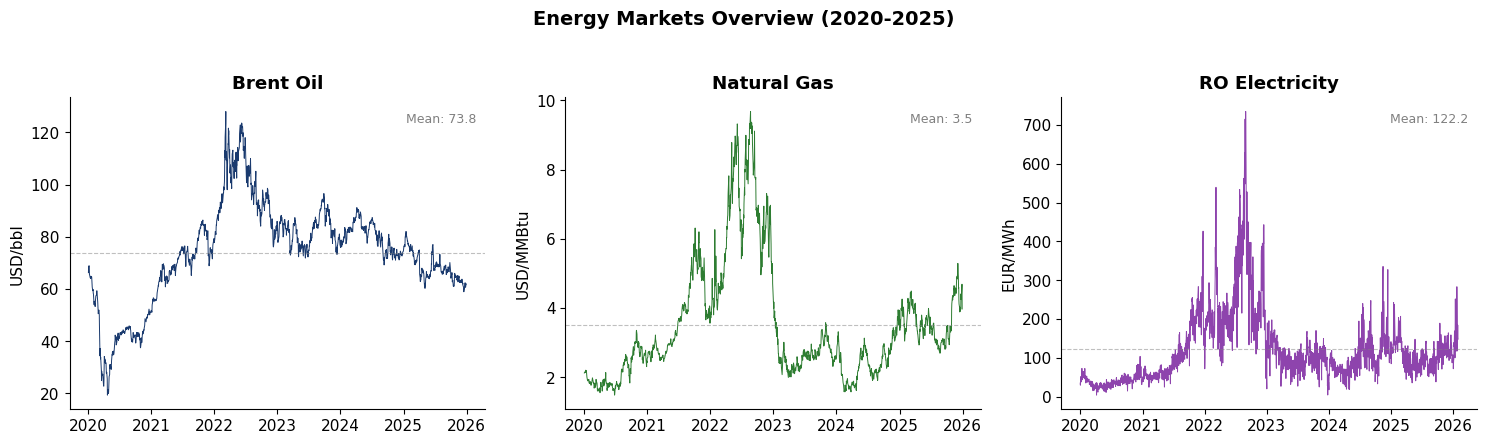

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4.5))
colors = [COLORS['blue'], COLORS['green'], COLORS['purple']]
units = ['USD/bbl', 'USD/MMBtu', 'EUR/MWh']

for ax, (name, series), c, unit in zip(axes, data.items(), colors, units):
    ax.plot(series.index, series.values, color=c, linewidth=0.7)
    ax.axhline(series.mean(), color='gray', ls='--', alpha=0.5, lw=0.8)
    ax.set_title(name.split(' (')[0], fontweight='bold')
    ax.set_ylabel(unit)
    # Add mean annotation
    ax.text(0.98, 0.95, f'Mean: {series.mean():.1f}', transform=ax.transAxes,
            ha='right', va='top', fontsize=9, color='gray')

fig.suptitle('Energy Markets Overview (2020-2025)', fontsize=14, fontweight='bold')
fig.tight_layout(rect=[0, 0, 1, 0.95])
save_fig(fig, 'energy_markets_overview.pdf')
plt.show()